In [41]:
%cd ../..
%load_ext autoreload
%autoreload 2
%matplotlib inline

/root
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pipeline import tracking, foraging_analysis, lab, experiment
from pipeline.ingest import tracking as tracking_ingest
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol in (100, 110, 120)').proj()


In [5]:
foraging_video = (foraging_sessions & tracking.Tracking) * lab.WaterRestriction.proj(h2o='water_restriction_number') * experiment.Session.proj('session_date')
foraging_video

subject_id institution 6 digit animal ID,session session number,h2o WR number,session_date
473360,49,HH08,2021-08-12
473360,50,HH08,2021-08-13
473360,51,HH08,2021-08-14
473360,52,HH08,2021-08-15
473360,53,HH08,2021-08-17
482353,33,HH13,2021-11-02
482353,34,HH13,2021-11-03
482353,36,HH13,2021-11-05
482353,37,HH13,2021-11-06
482353,42,HH13,2021-11-12


In [14]:
key = {'subject_id': 482353, 'session': 45}

In [15]:
tracking.Tracking.Frame & key & {'tracking_device': 'Camera 1'}

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,frame_time Global session-wise time (in sec)
482353,45,1,Camera 1,=BLOB=
482353,45,2,Camera 1,=BLOB=
482353,45,3,Camera 1,=BLOB=
482353,45,4,Camera 1,=BLOB=
482353,45,5,Camera 1,=BLOB=
482353,45,6,Camera 1,=BLOB=
482353,45,7,Camera 1,=BLOB=
482353,45,8,Camera 1,=BLOB=
482353,45,9,Camera 1,=BLOB=
482353,45,10,Camera 1,=BLOB=


In [16]:
tracking.Tracking.TongueTracking & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelihood
482353,45,1,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,2,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,3,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,4,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,5,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,6,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,7,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,8,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,9,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,10,Camera 1,=BLOB=,=BLOB=,=BLOB=


In [20]:
ingest_history = tracking_ingest.TrackingIngestForaging.TrackingFile & key
ingest_history

subject_id institution 6 digit animal ID,session session number,tracking_device device type/function,trial trial number (1-based indexing),video_trial_num cache the ni-to-video trial mapping,tracking_file tracking file subpath
482353,45,Camera 1,1,1,HH13/HH13_S10_20211117/bottom_face_1-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,2,2,HH13/HH13_S10_20211117/bottom_face_2-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,3,3,HH13/HH13_S10_20211117/bottom_face_3-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,4,4,HH13/HH13_S10_20211117/bottom_face_4-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,5,5,HH13/HH13_S10_20211117/bottom_face_5-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,6,6,HH13/HH13_S10_20211117/bottom_face_6-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,7,7,HH13/HH13_S10_20211117/bottom_face_7-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,8,8,HH13/HH13_S10_20211117/bottom_face_8-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,9,9,HH13/HH13_S10_20211117/bottom_face_9-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,10,10,HH13/HH13_S10_20211117/bottom_face_10-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv


In [28]:
look_up = pd.DataFrame(ingest_history.fetch())

In [101]:
key = {'subject_id': 482353, 'session': 42}

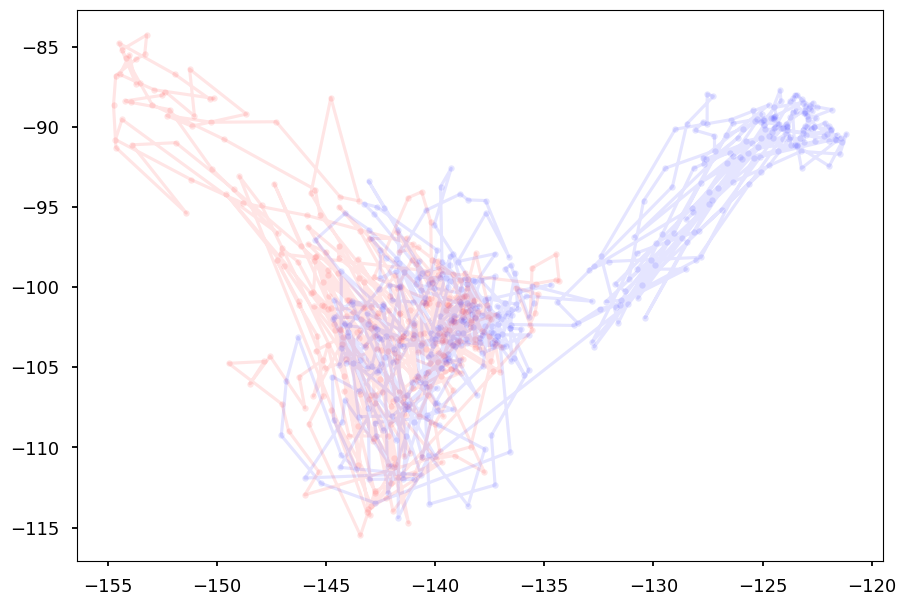

In [104]:
# np.random.seed(42)
for side, col in [['left', 'r'], ['right', 'b']]:
    this_trials = experiment.WaterPortChoice & key & {'water_port': side}
    xs, ys, likelihood = (tracking.Tracking.TongueTracking & key & this_trials).fetch('tongue_x', 'tongue_y', 'tongue_likelihood')
    random_trials = np.random.choice(len(xs), 1)
    
    for x, y, l in zip(xs[random_trials], ys[random_trials], likelihood[random_trials]):
        valid = l >= 0.9
        plt.plot(-x[valid], -y[valid], '.-', c=col, alpha=0.1)

plt.show()